In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

def func1(a, b, x):
    return round((a + (b * x)), 2)

def func2(a, b, x):
    return round((a + (b * (x ** 2))), 2)

def generate_array(a, b):
    array = []
    for item in index:
        array.append(func1(a, b, item))
    return array

def generate_array_random(a, b):
    array = []
    for item in index:
        array.append(func1(a, b, item) + (10 * random.random()))
    return array

def calc_loss(y1, y2):
    loss = 0
    for item in index:
        loss += abs(y1[item] - y2[item])
    return loss

def calc_grad(a, b, y1):
    au = a + 0.01
    bu = b + 0.01

    yua = generate_array(au, b)
    yub = generate_array(a, bu)

    ua_loss = calc_loss(y1, yua)
    ub_loss = calc_loss(y1, yub)

    return ua_loss, ub_loss

def update_params(ua_loss, ub_loss, previous_loss, learning_rate):
    update_a = ((previous_loss - ua_loss) / 0.01) * learning_rate
    update_b = ((previous_loss - ub_loss) / 0.01) * learning_rate

    return update_a, update_b

In [3]:
a1 = 5.45
b1 = 1.76

y1 = generate_array_random(a1, b1)

In [4]:
a2 = 7.37
b2 = -1.22

y2 = generate_array(a2, b2)

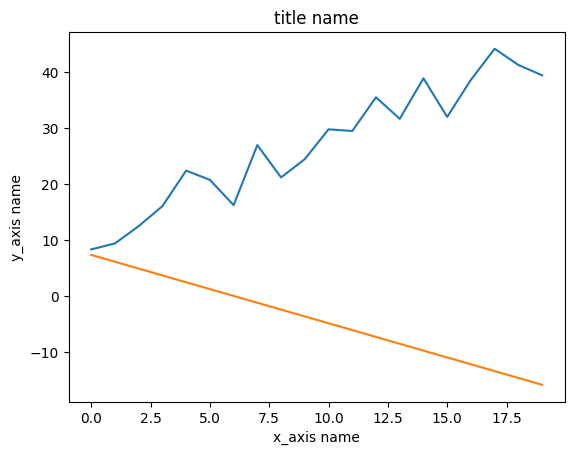

In [5]:
plt.plot(index, y1)
plt.plot(index, y2)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

In [6]:
init_loss = calc_loss(y1, y2)

print(init_loss)

623.4886846576803


In [7]:
a2n = a2
b2n = b2
y2n = generate_array(a2n, b2n)
loss = init_loss

In [8]:
for step in range(1000000):
    ua_loss, ub_loss = calc_grad(a2n, b2n, y1)

    update_a, update_b = update_params(ua_loss, ub_loss, loss, 0.001)

    a2n += update_a
    b2n += update_b

    y2n = generate_array(a2n, b2n)

    previous_loss = loss

    loss = calc_loss(y1, y2n)

    # if previous_loss < loss:
    #     break

    # print(step)

    # time.sleep(0.2)

    # print(a2n, b2n, previous_loss)

    # plt.plot(index, y1)
    # plt.plot(index, y2n)
    # plt.title('title name')
    # plt.xlabel('x_axis name')
    # plt.ylabel('y_axis name')
    # plt.show()

5.45 -1.22 623.4886846576803
8.8204792467287 1.846932451572785 51.32269209327811


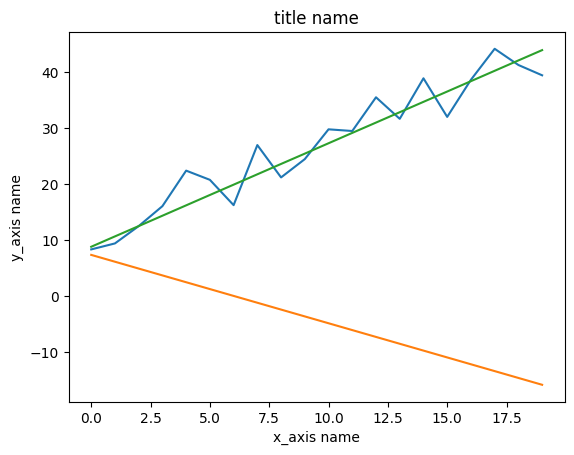

In [9]:
print(a1, b2, init_loss)
print(a2n, b2n, loss)

plt.plot(index, y1)
plt.plot(index, y2)
plt.plot(index, y2n)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()